# Data Science workflow  

In this sequence of notebooks, we will exemplify the inner steps in the Data Science workflow.  
We are not going to discuss the business requirements and deployment strategies, but just the phases below:

### I - Exploratory Data Analysis (this notebook)  
##### II - Feature Engineering and Selection 
##### III - Modeling  
##### IV - Evaluation  

This notebook will cover the Exploratory Data Analysis (EDA)

## I - Exploratory Data Analysis  

Exploratory Data Analysis is a set of techniques that were developed by John Wilder Tukey in 1970. The philosophy behind this approach was to examine the data before building a model.  
John Tukey encouraged statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments.  

Today Data scientists and analysts spend most of their time in Data Wrangling and Exploratory Data Analysis also known as EDA. But what is this EDA and why it is so important? 
Exploratory Data Analysis (EDA) is a step in the Data Science Workflow, where a number of techniques are used to better understand the dataset being used.

‘Understanding the dataset’ can refer to a number of things including but not limited to…

+ Get maximum insights from a data set
+ Uncover underlying structure
+ Extracting important variables and leaving behind useless variables
+ Identifying outliers, anomalies, missing values, or human error
+ Understanding the relationship(s), or lack of, between variables
+ Test underlying assumptions
+ Ultimately, maximizing your insights of a dataset and minimizing potential error that may occur later in the process

##### Let's see how exploratory data analysis is regarded in CRISP-DM and CRISP-ML:

## CRISP-DM

The CRoss Industry Standard Process for Data Mining ([CRISP-DM](https://www.datascience-pm.com/crisp-dm-2/)) is a process model that serves as the base for a data science process.  
It has six sequential phases:

+ Business understanding – What does the business need?
+ Data understanding – What data do we have / need? Is it clean?
+ Data preparation – How do we organize the data for modeling?
+ Modeling – What modeling techniques should we apply?
+ Evaluation – Which model best meets the business objectives?
+ Deployment – How do stakeholders access the results?


![CRISP-DM Process](https://miro.medium.com/max/736/1*0-mnwXXLlMB_bEQwp-706Q.png)

The machine learning community is still trying to establish a standard process model for machine learning development. As a result, many machine learning and data science projects are still not well organized. Results are not reproducible.  
In general, such projects are conducted in an ad-hoc manner. To guide ML practitioners through the development life cycle, the Cross-Industry Standard Process for the development of Machine Learning applications with Quality assurance methodology ([CRISP-ML(Q)](https://ml-ops.org/content/crisp-ml)) was recently proposed.  

There is a particular order of the individual stages. Still, machine learning workflows are fundamentally iterative and exploratory, so that depending on the results from the later phases, we might re-examine earlier steps.

## CRISP-ML

![CRISP-ML Process](https://ml-ops.org/img/crisp-ml-process.jpg)  
[Source](https://ml-ops.org/content/crisp-ml)

If we explode the EDA phase in each of the previous frameworks, we would have something like this:

![EDA](https://www.researchgate.net/publication/329930775/figure/fig3/AS:873046667710469@1585161954284/The-fundamental-steps-of-the-exploratory-data-analysis-process_W640.jpg)  
[Source](https://www.researchgate.net/publication/329930775_A_comprehensive_review_of_tools_for_exploratory_analysis_of_tabular_industrial_datasets)

### Starting the EDA

### 1. Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 2. Load Dataset and Distinguishing Attributes

##### Visually inspecting the dataset

In [0]:
df = pd.read_csv('Data/Automobile_data.csv')
df.head()

symboling 
 normalized-losses 
 make 
 fuel-type 
 aspiration 
 num-of-doors 
 body-style 
 drive-wheels 
 engine-location 
 wheel-base 
 ... 
 engine-size 
 fuel-system 
 bore 
 stroke 
 compression-ratio 
 horsepower 
 peak-rpm 
 city-mpg 
 highway-mpg 
 price 
 
 
 
 
 0 
 3 
 ? 
 alfa-romero 
 gas 
 std 
 two 
 convertible 
 rwd 
 front 
 88.6 
 ... 
 130 
 mpfi 
 3.47 
 2.68 
 9.0 
 111 
 5000 
 21 
 27 
 13495 
 
 
 1 
 3 
 ? 
 alfa-romero 
 gas 
 std 
 two 
 convertible 
 rwd 
 front 
 88.6 
 ... 
 130 
 mpfi 
 3.47 
 2.68 
 9.0 
 111 
 5000 
 21 
 27 
 16500 
 
 
 2 
 1 
 ? 
 alfa-romero 
 gas 
 std 
 two 
 hatchback 
 rwd 
 front 
 94.5 
 ... 
 152 
 mpfi 
 2.68 
 3.47 
 9.0 
 154 
 5000 
 19 
 26 
 16500 
 
 
 3 
 2 
 164 
 audi 
 gas 
 std 
 four 
 sedan 
 fwd 
 front 
 99.8 
 ... 
 109 
 mpfi 
 3.19 
 3.4 
 10.0 
 102 
 5500 
 24 
 30 
 13950 
 
 
 4 
 2 
 164 
 audi 
 gas 
 std 
 four 
 sedan 
 4wd 
 front 
 99.4 
 ... 
 136 
 mpfi 
 3.19 
 3.4 
 8.0 
 115 
 5500 
 18 
 22 
 17450 
 
 
 
 5 rows × 26 columns

##### Checking basic statistics - first insight on distributions

In [0]:
df.describe()

symboling 
 wheel-base 
 length 
 width 
 height 
 curb-weight 
 engine-size 
 compression-ratio 
 city-mpg 
 highway-mpg 
 
 
 
 
 count 
 205.000000 
 205.000000 
 205.000000 
 205.000000 
 205.000000 
 205.000000 
 205.000000 
 205.000000 
 205.000000 
 205.000000 
 
 
 mean 
 0.834146 
 98.756585 
 174.049268 
 65.907805 
 53.724878 
 2555.565854 
 126.907317 
 10.142537 
 25.219512 
 30.751220 
 
 
 std 
 1.245307 
 6.021776 
 12.337289 
 2.145204 
 2.443522 
 520.680204 
 41.642693 
 3.972040 
 6.542142 
 6.886443 
 
 
 min 
 -2.000000 
 86.600000 
 141.100000 
 60.300000 
 47.800000 
 1488.000000 
 61.000000 
 7.000000 
 13.000000 
 16.000000 
 
 
 25% 
 0.000000 
 94.500000 
 166.300000 
 64.100000 
 52.000000 
 2145.000000 
 97.000000 
 8.600000 
 19.000000 
 25.000000 
 
 
 50% 
 1.000000 
 97.000000 
 173.200000 
 65.500000 
 54.100000 
 2414.000000 
 120.000000 
 9.000000 
 24.000000 
 30.000000 
 
 
 75% 
 2.000000 
 102.400000 
 183.100000 
 66.900000 
 55.500000 
 2935.000000 
 141.000000 
 9.400000 
 30.000000 
 34.000000 
 
 
 max 
 3.000000 
 120.900000 
 208.100000 
 72.300000 
 59.800000 
 4066.000000 
 326.000000 
 23.000000 
 49.000000 
 54.000000

##### Checking columns and data types

In [0]:
#df.columns
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

##### At this moment, you look for columns that shall be transformed/converted later in the workflow.

In [0]:
print(df.select_dtypes(include='number').columns)
print(df.select_dtypes(include='object').columns)
print(df.select_dtypes(include='category').columns)

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')
Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')
Index([], dtype='object')


### 3. Check for missing values

In [0]:
df.isnull().sum()

Out[101]: symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

It seems there are not missing values, but that may be misleading. Let's explore a bit more:

In [0]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

symboling : [ 3  1  2  0 -1 -2]
normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num-of-doors : ['two' 'four' '?']
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels : ['rwd' 'fwd' '4wd']
engine-location : ['front' 'rear']
wheel-base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

There are null values in our dataset in form of ‘?’ only but Pandas is not recognizing them so we will replace them into np.nan form.

In [0]:
for col in df.columns:
    df[col].replace({'?': np.nan},inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [0]:
df.isnull().sum()

Out[104]: symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### 3.1 Visualizing the missing values  
Now the missing values are identified in the dataframe. With the help of heatmap, we can see the amount of data that is missing from the attribute. With this, we can make decisions whether to drop these missing values or to replace them. Usually dropping the missing values is not advisable but sometimes it may be helpful too.

Out[105]: <AxesSubplot:>

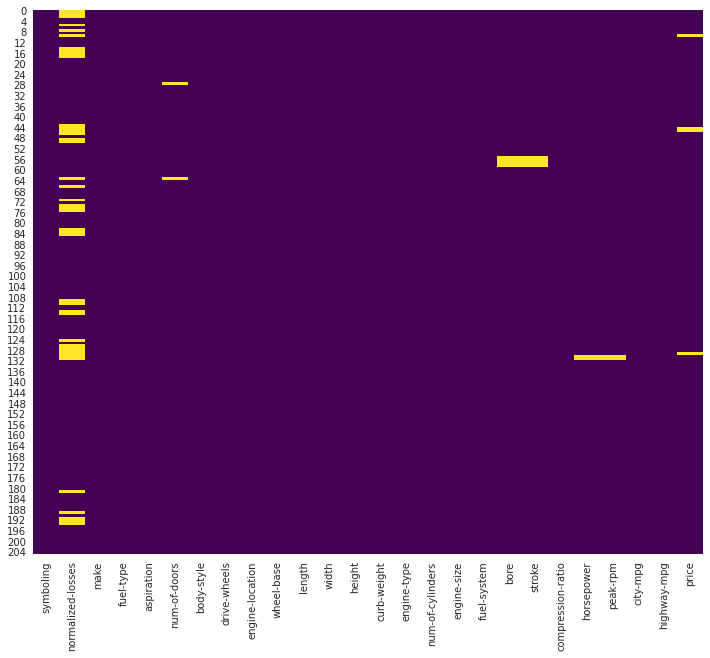

In [0]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

Now observe that there are many missing values in normalized_losses while other columns have fewer missing values. We can’t drop the normalized_losses column as it may be important for our prediction.  
We can also use the **missingno** libray for a better evaluation of the missing values. First we can check the quantity and how they distribute among the rows:

In [0]:
#!pip install missingno

In [0]:
import missingno as msno

Out[108]: <AxesSubplot:>

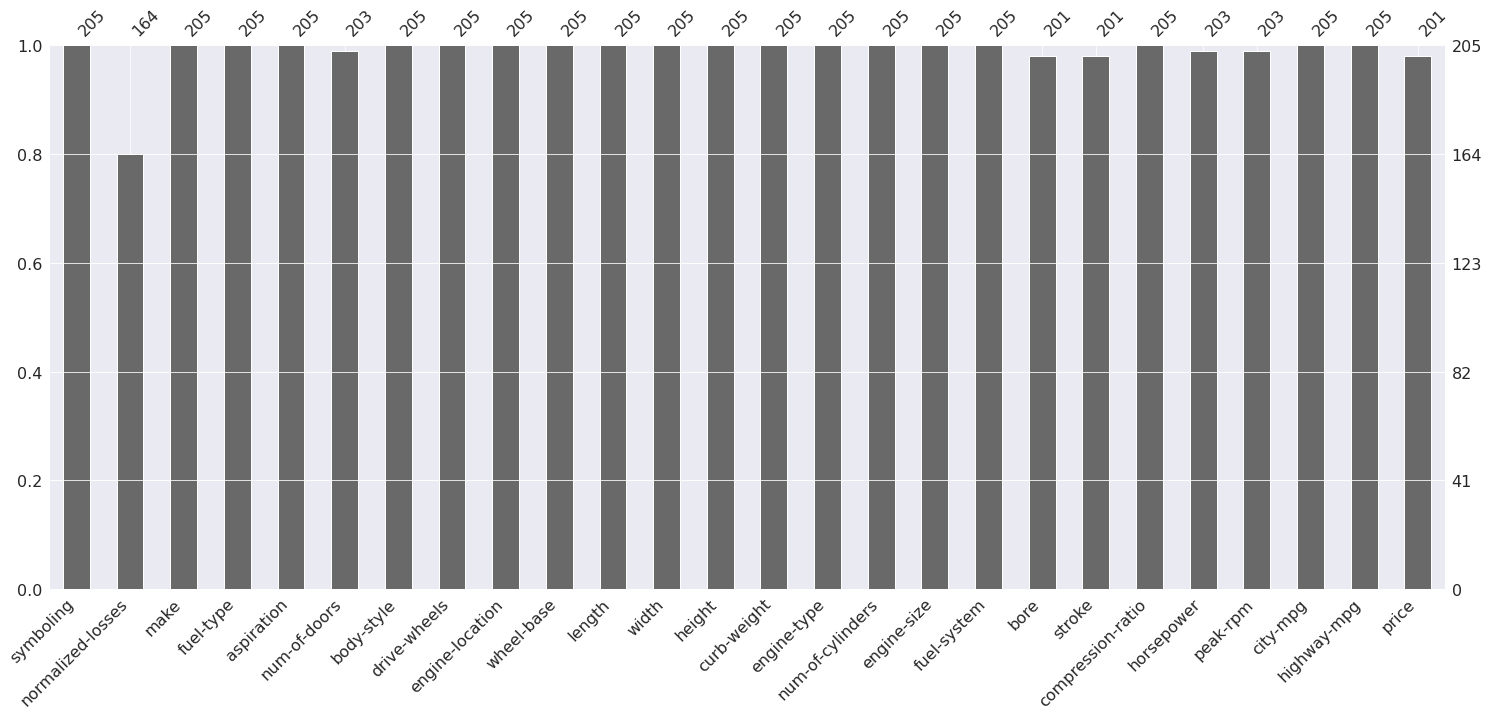

In [0]:
msno.bar(df)

Out[109]: <AxesSubplot:>

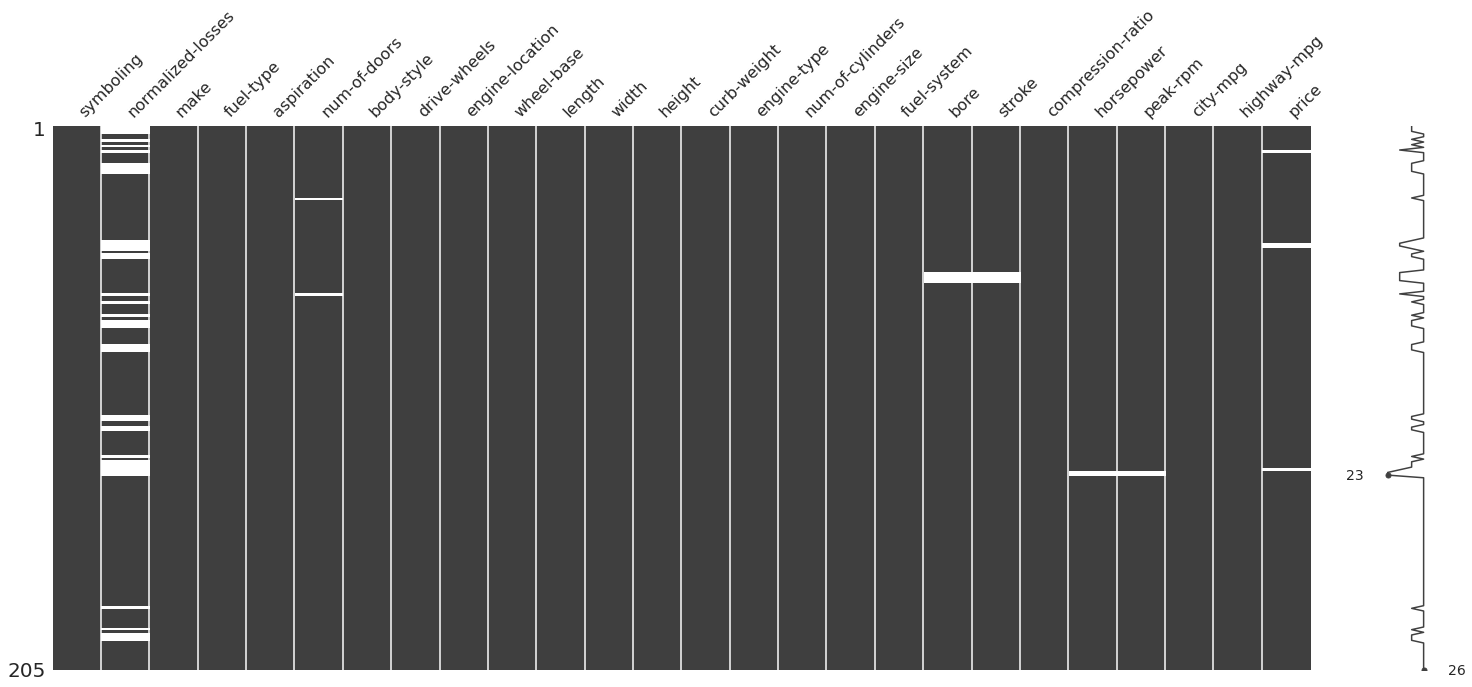

In [0]:
msno.matrix(df)

The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another

Out[110]: <AxesSubplot:>

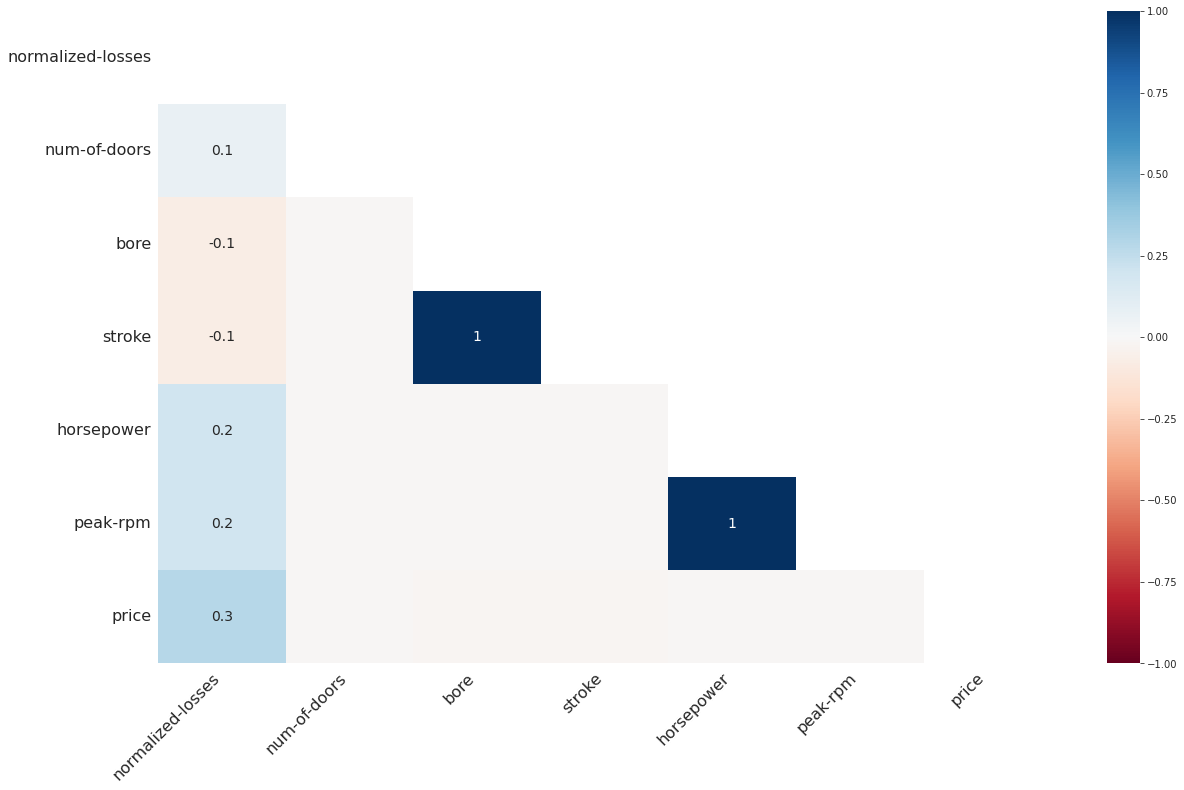

In [0]:
msno.heatmap(df)

The dendrogram allows you to more fully correlate variable completion, revealing trends deeper than the pairwise ones visible in the correlation heatmap

Out[111]: <AxesSubplot:>

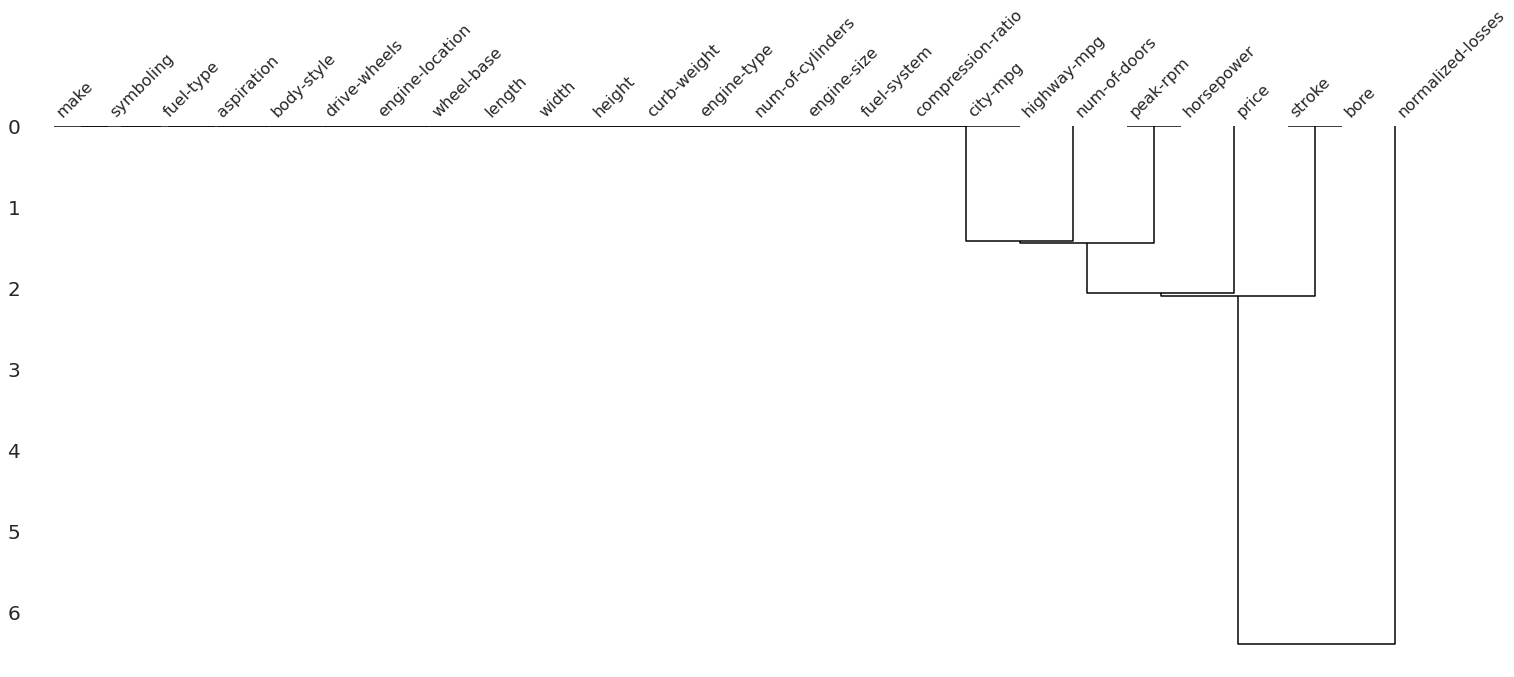

In [0]:
msno.dendrogram(df)

#### 3.2. Replacing the missing values
We will be replacing these missing values with mean because the number of missing values is not great (we could have used the median too).  
Later, in the data preparation phase, we will learn other imputation techniques.

In [0]:
df.select_dtypes(include='number').head()

symboling 
 wheel-base 
 length 
 width 
 height 
 curb-weight 
 engine-size 
 compression-ratio 
 city-mpg 
 highway-mpg 
 
 
 
 
 0 
 3 
 88.6 
 168.8 
 64.1 
 48.8 
 2548 
 130 
 9.0 
 21 
 27 
 
 
 1 
 3 
 88.6 
 168.8 
 64.1 
 48.8 
 2548 
 130 
 9.0 
 21 
 27 
 
 
 2 
 1 
 94.5 
 171.2 
 65.5 
 52.4 
 2823 
 152 
 9.0 
 19 
 26 
 
 
 3 
 2 
 99.8 
 176.6 
 66.2 
 54.3 
 2337 
 109 
 10.0 
 24 
 30 
 
 
 4 
 2 
 99.4 
 176.6 
 66.4 
 54.3 
 2824 
 136 
 8.0 
 18 
 22

In [0]:
df.select_dtypes(include='object').head()

normalized-losses 
 make 
 fuel-type 
 aspiration 
 num-of-doors 
 body-style 
 drive-wheels 
 engine-location 
 engine-type 
 num-of-cylinders 
 fuel-system 
 bore 
 stroke 
 horsepower 
 peak-rpm 
 price 
 
 
 
 
 0 
 NaN 
 alfa-romero 
 gas 
 std 
 two 
 convertible 
 rwd 
 front 
 dohc 
 four 
 mpfi 
 3.47 
 2.68 
 111 
 5000 
 13495 
 
 
 1 
 NaN 
 alfa-romero 
 gas 
 std 
 two 
 convertible 
 rwd 
 front 
 dohc 
 four 
 mpfi 
 3.47 
 2.68 
 111 
 5000 
 16500 
 
 
 2 
 NaN 
 alfa-romero 
 gas 
 std 
 two 
 hatchback 
 rwd 
 front 
 ohcv 
 six 
 mpfi 
 2.68 
 3.47 
 154 
 5000 
 16500 
 
 
 3 
 164 
 audi 
 gas 
 std 
 four 
 sedan 
 fwd 
 front 
 ohc 
 four 
 mpfi 
 3.19 
 3.4 
 102 
 5500 
 13950 
 
 
 4 
 164 
 audi 
 gas 
 std 
 four 
 sedan 
 4wd 
 front 
 ohc 
 five 
 mpfi 
 3.19 
 3.4 
 115 
 5500 
 17450

Now let's transform the mistaken datatypes for numeric values and fill with the mean, using the strategy we have chosen.

In [0]:
num_col = ['normalized-losses', 'bore',  'stroke', 'horsepower', 'peak-rpm','price']
for col in num_col:
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

symboling 
 normalized-losses 
 make 
 fuel-type 
 aspiration 
 num-of-doors 
 body-style 
 drive-wheels 
 engine-location 
 wheel-base 
 ... 
 engine-size 
 fuel-system 
 bore 
 stroke 
 compression-ratio 
 horsepower 
 peak-rpm 
 city-mpg 
 highway-mpg 
 price 
 
 
 
 
 0 
 3 
 122.0 
 alfa-romero 
 gas 
 std 
 two 
 convertible 
 rwd 
 front 
 88.6 
 ... 
 130 
 mpfi 
 3.47 
 2.68 
 9.0 
 111.0 
 5000.0 
 21 
 27 
 13495.0 
 
 
 1 
 3 
 122.0 
 alfa-romero 
 gas 
 std 
 two 
 convertible 
 rwd 
 front 
 88.6 
 ... 
 130 
 mpfi 
 3.47 
 2.68 
 9.0 
 111.0 
 5000.0 
 21 
 27 
 16500.0 
 
 
 2 
 1 
 122.0 
 alfa-romero 
 gas 
 std 
 two 
 hatchback 
 rwd 
 front 
 94.5 
 ... 
 152 
 mpfi 
 2.68 
 3.47 
 9.0 
 154.0 
 5000.0 
 19 
 26 
 16500.0 
 
 
 3 
 2 
 164.0 
 audi 
 gas 
 std 
 four 
 sedan 
 fwd 
 front 
 99.8 
 ... 
 109 
 mpfi 
 3.19 
 3.40 
 10.0 
 102.0 
 5500.0 
 24 
 30 
 13950.0 
 
 
 4 
 2 
 164.0 
 audi 
 gas 
 std 
 four 
 sedan 
 4wd 
 front 
 99.4 
 ... 
 136 
 mpfi 
 3.19 
 3.40 
 8.0 
 115.0 
 5500.0 
 18 
 22 
 17450.0 
 
 
 
 5 rows × 26 columns

### 4. Checking Data Distributions

This is the most important step in EDA. 
- This step will decide how much insight you can get.
- Checking the distributions is fundamental for feature selection and the modeling phase
- This step varies from person to person in terms of their questioning ability. 

Let's check the univariate and bivariate distributions and correlation between different variables, this will give us a roadmap on how to proceed further.

#### 4.1 Univariate Analysis  

The goal here is just to check the distribution of numeric and categorical variables (more about this later in the course)  
We can quickly check the distributions of every numeric column:

In [0]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Out[115]: Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

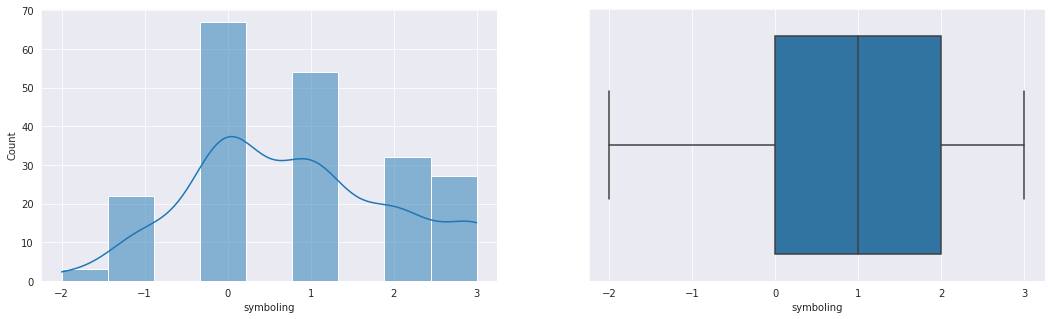

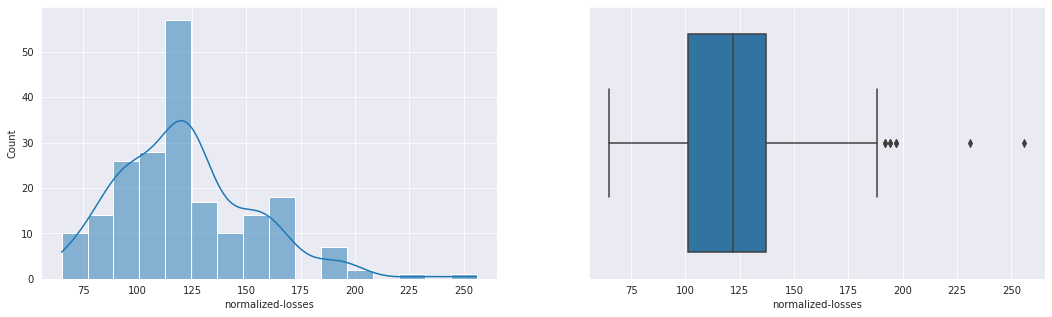

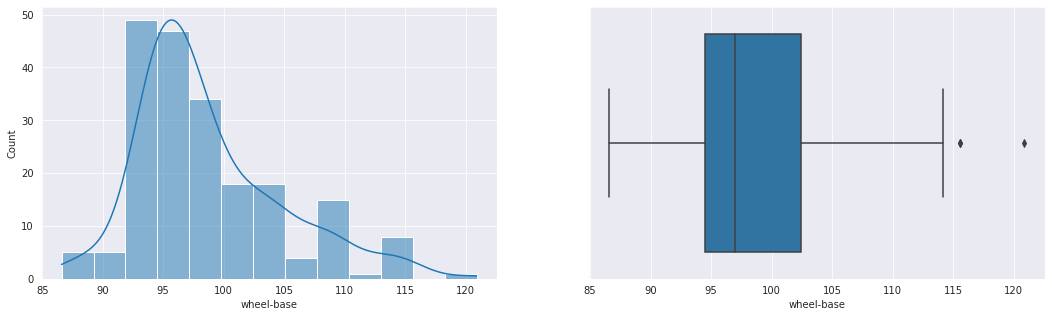

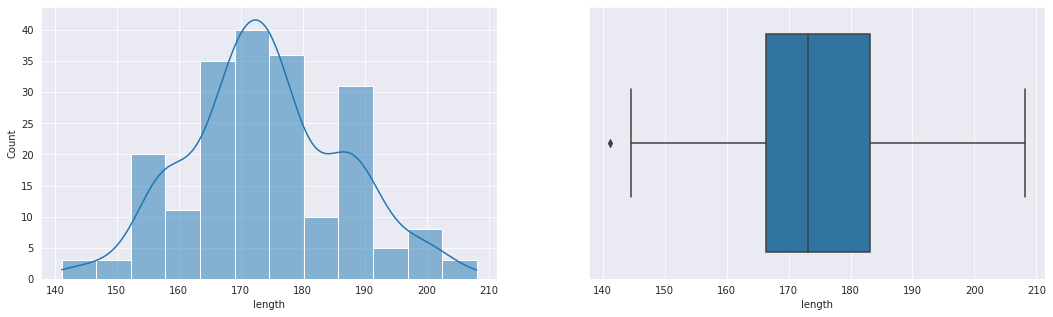

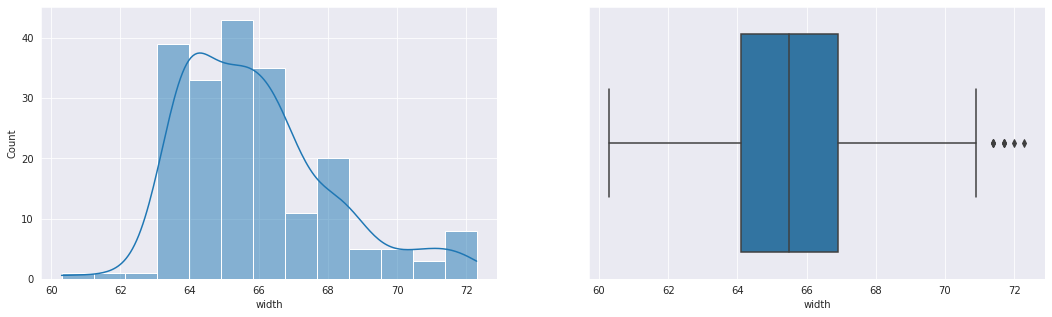

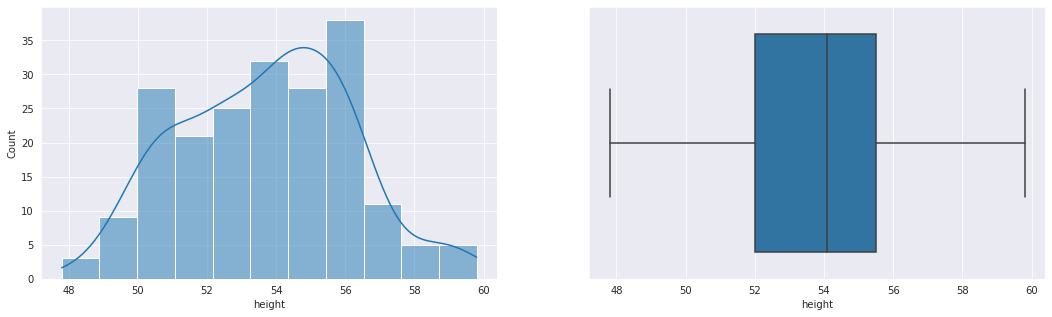

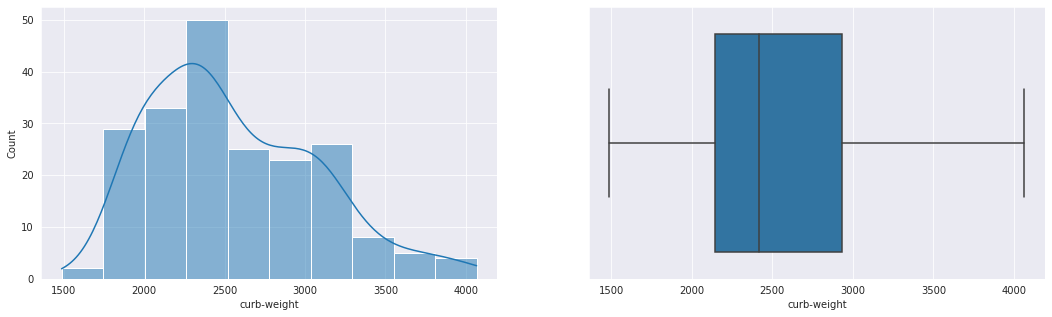

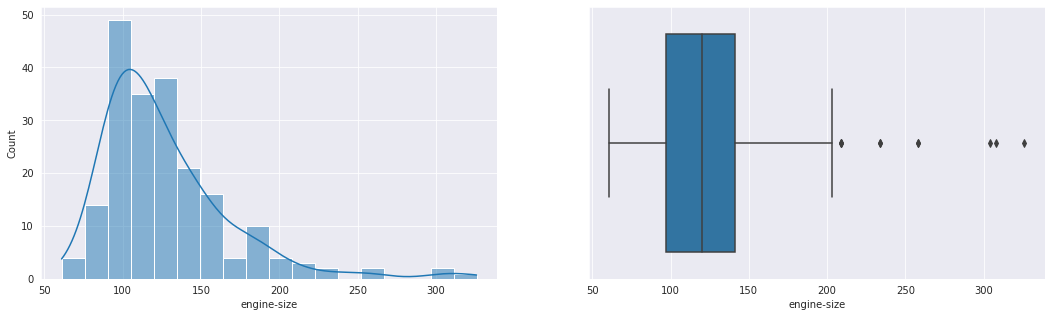

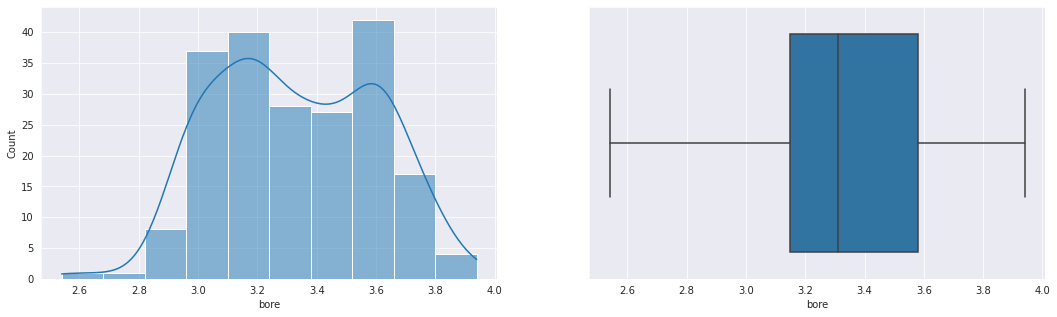

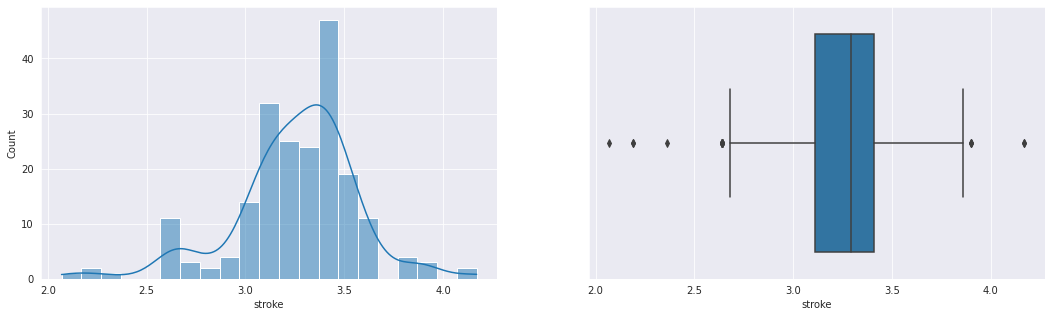

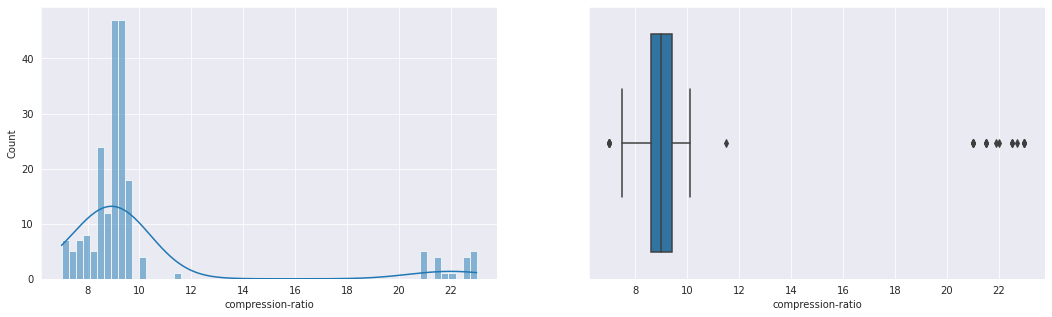

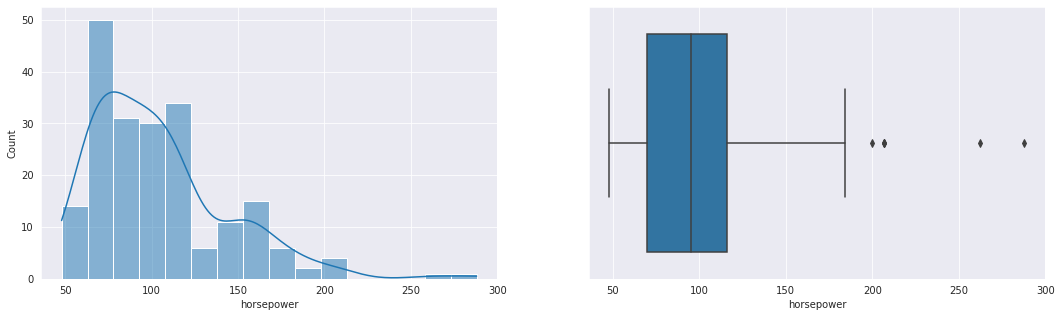

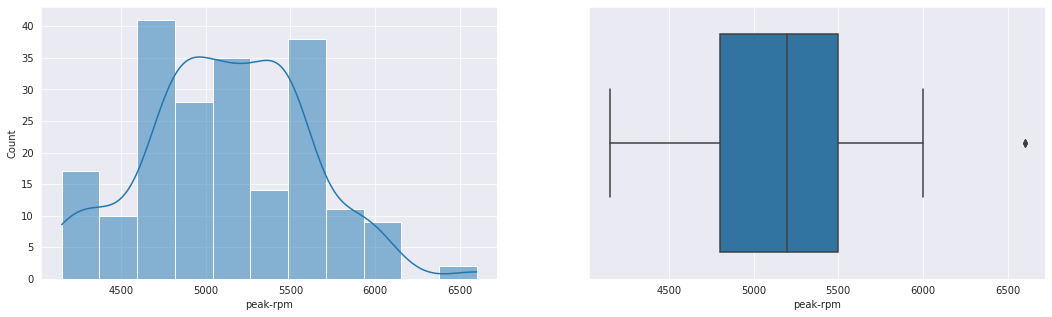

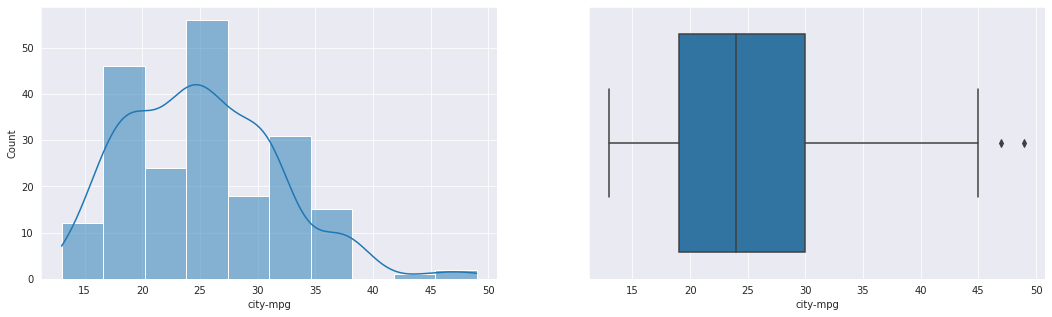

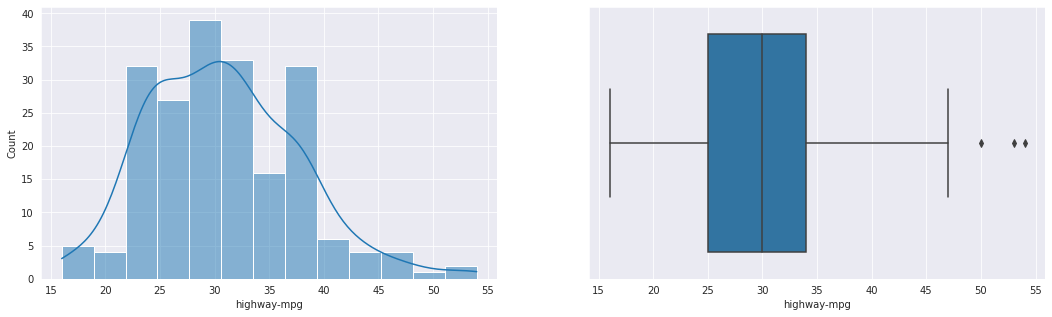

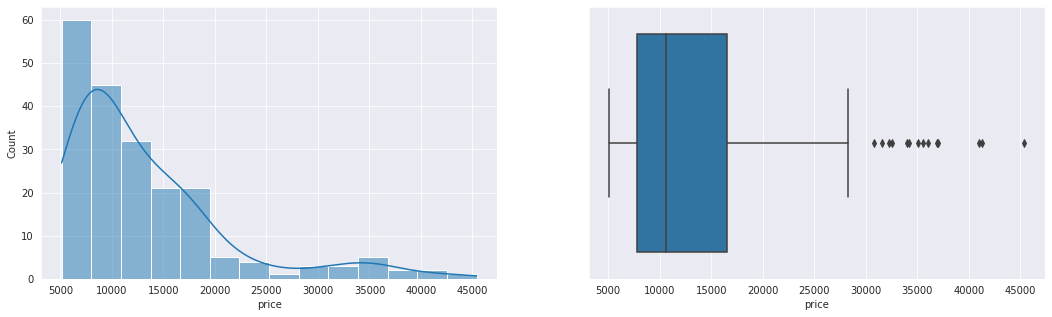

In [0]:
for col in numeric_cols:
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    #sns.distplot(df[col])
    sns.histplot(df[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.show()

##### Checking for outliers

![Outliers](https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/Normal%20Distribution%20deviations.png)

Assuming the data would follow a normal distribution, we can choose some of the graphs to examine in more detail:

Out[117]: <seaborn.axisgrid.FacetGrid at 0x7f526eb184c0><Figure size 576x864 with 0 Axes>

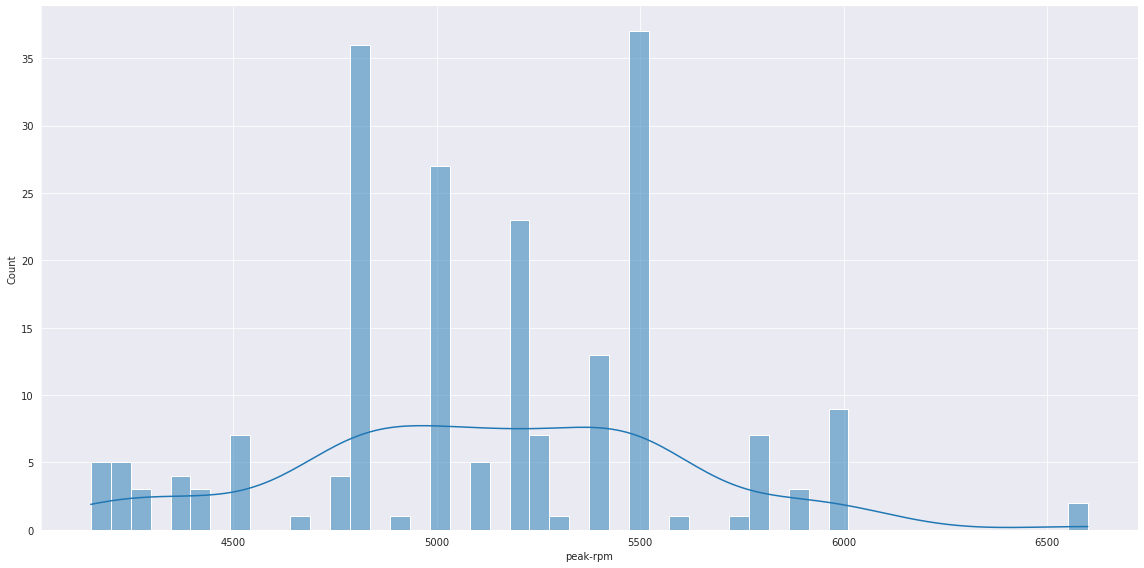

In [0]:
#set the style we wish to use for our plots
sns.set_style("darkgrid")

#plot the distribution of the DataFrame "Price" column
plt.figure(figsize=(8,12))
#sns.histplot(df['price'])
sns.displot(df['peak-rpm'], kde=True, bins=50, height=8, aspect=2)  
#https://towardsdatascience.com/a-major-seaborn-plotting-tip-i-wish-i-had-learned-earlier-d8209ad0a20e

Out[118]: <AxesSubplot:xlabel='peak-rpm'>

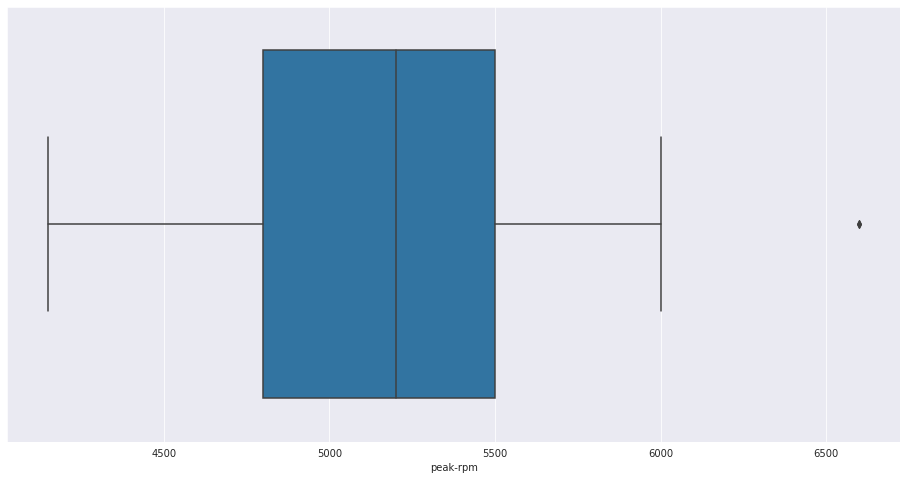

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="peak-rpm", data=df, ax=ax)

We will not treat outliers during Exploratory Data Analysis, but we will get back to them in the Data Preparation phase.

##### Analizing distributions on categorical variables

Although it is not one of the recommended plots, we can always use the pie plots in special situations:

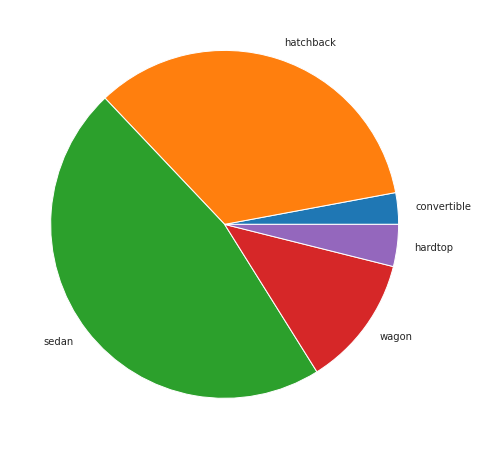

In [0]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(df["body-style"].value_counts(sort=False), labels=df["body-style"].unique())
plt.show()

Barplots with frequencies can be created on Matplotlib

Out[120]: <AxesSubplot:>

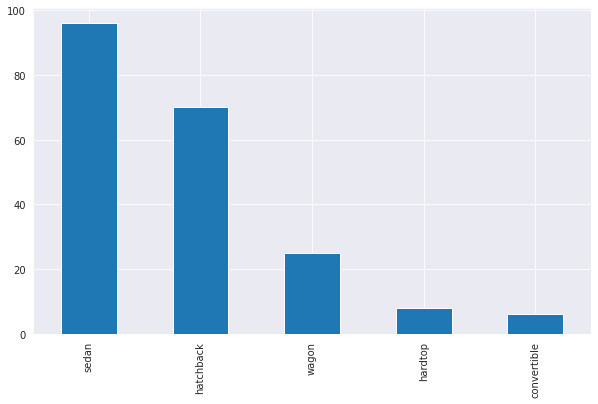

In [0]:
df["body-style"].value_counts().plot(kind="bar", figsize=(10,6))

There is no need to separately calculate the count when using the sns.countplot() function

/databricks/python/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[121]: <AxesSubplot:xlabel='body-style', ylabel='count'>

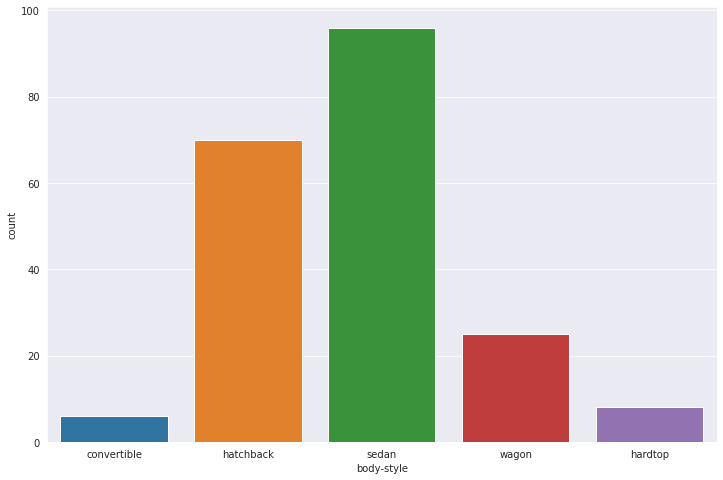

In [0]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(df["body-style"], ax=ax) 

#### 4.2 Bivariate Analysis  

Now we want to check the relationships between pais of variables. We can start by drawing a pairplot and a correlation plot.

Out[122]: <seaborn.axisgrid.PairGrid at 0x7f526e881940><Figure size 720x720 with 0 Axes>

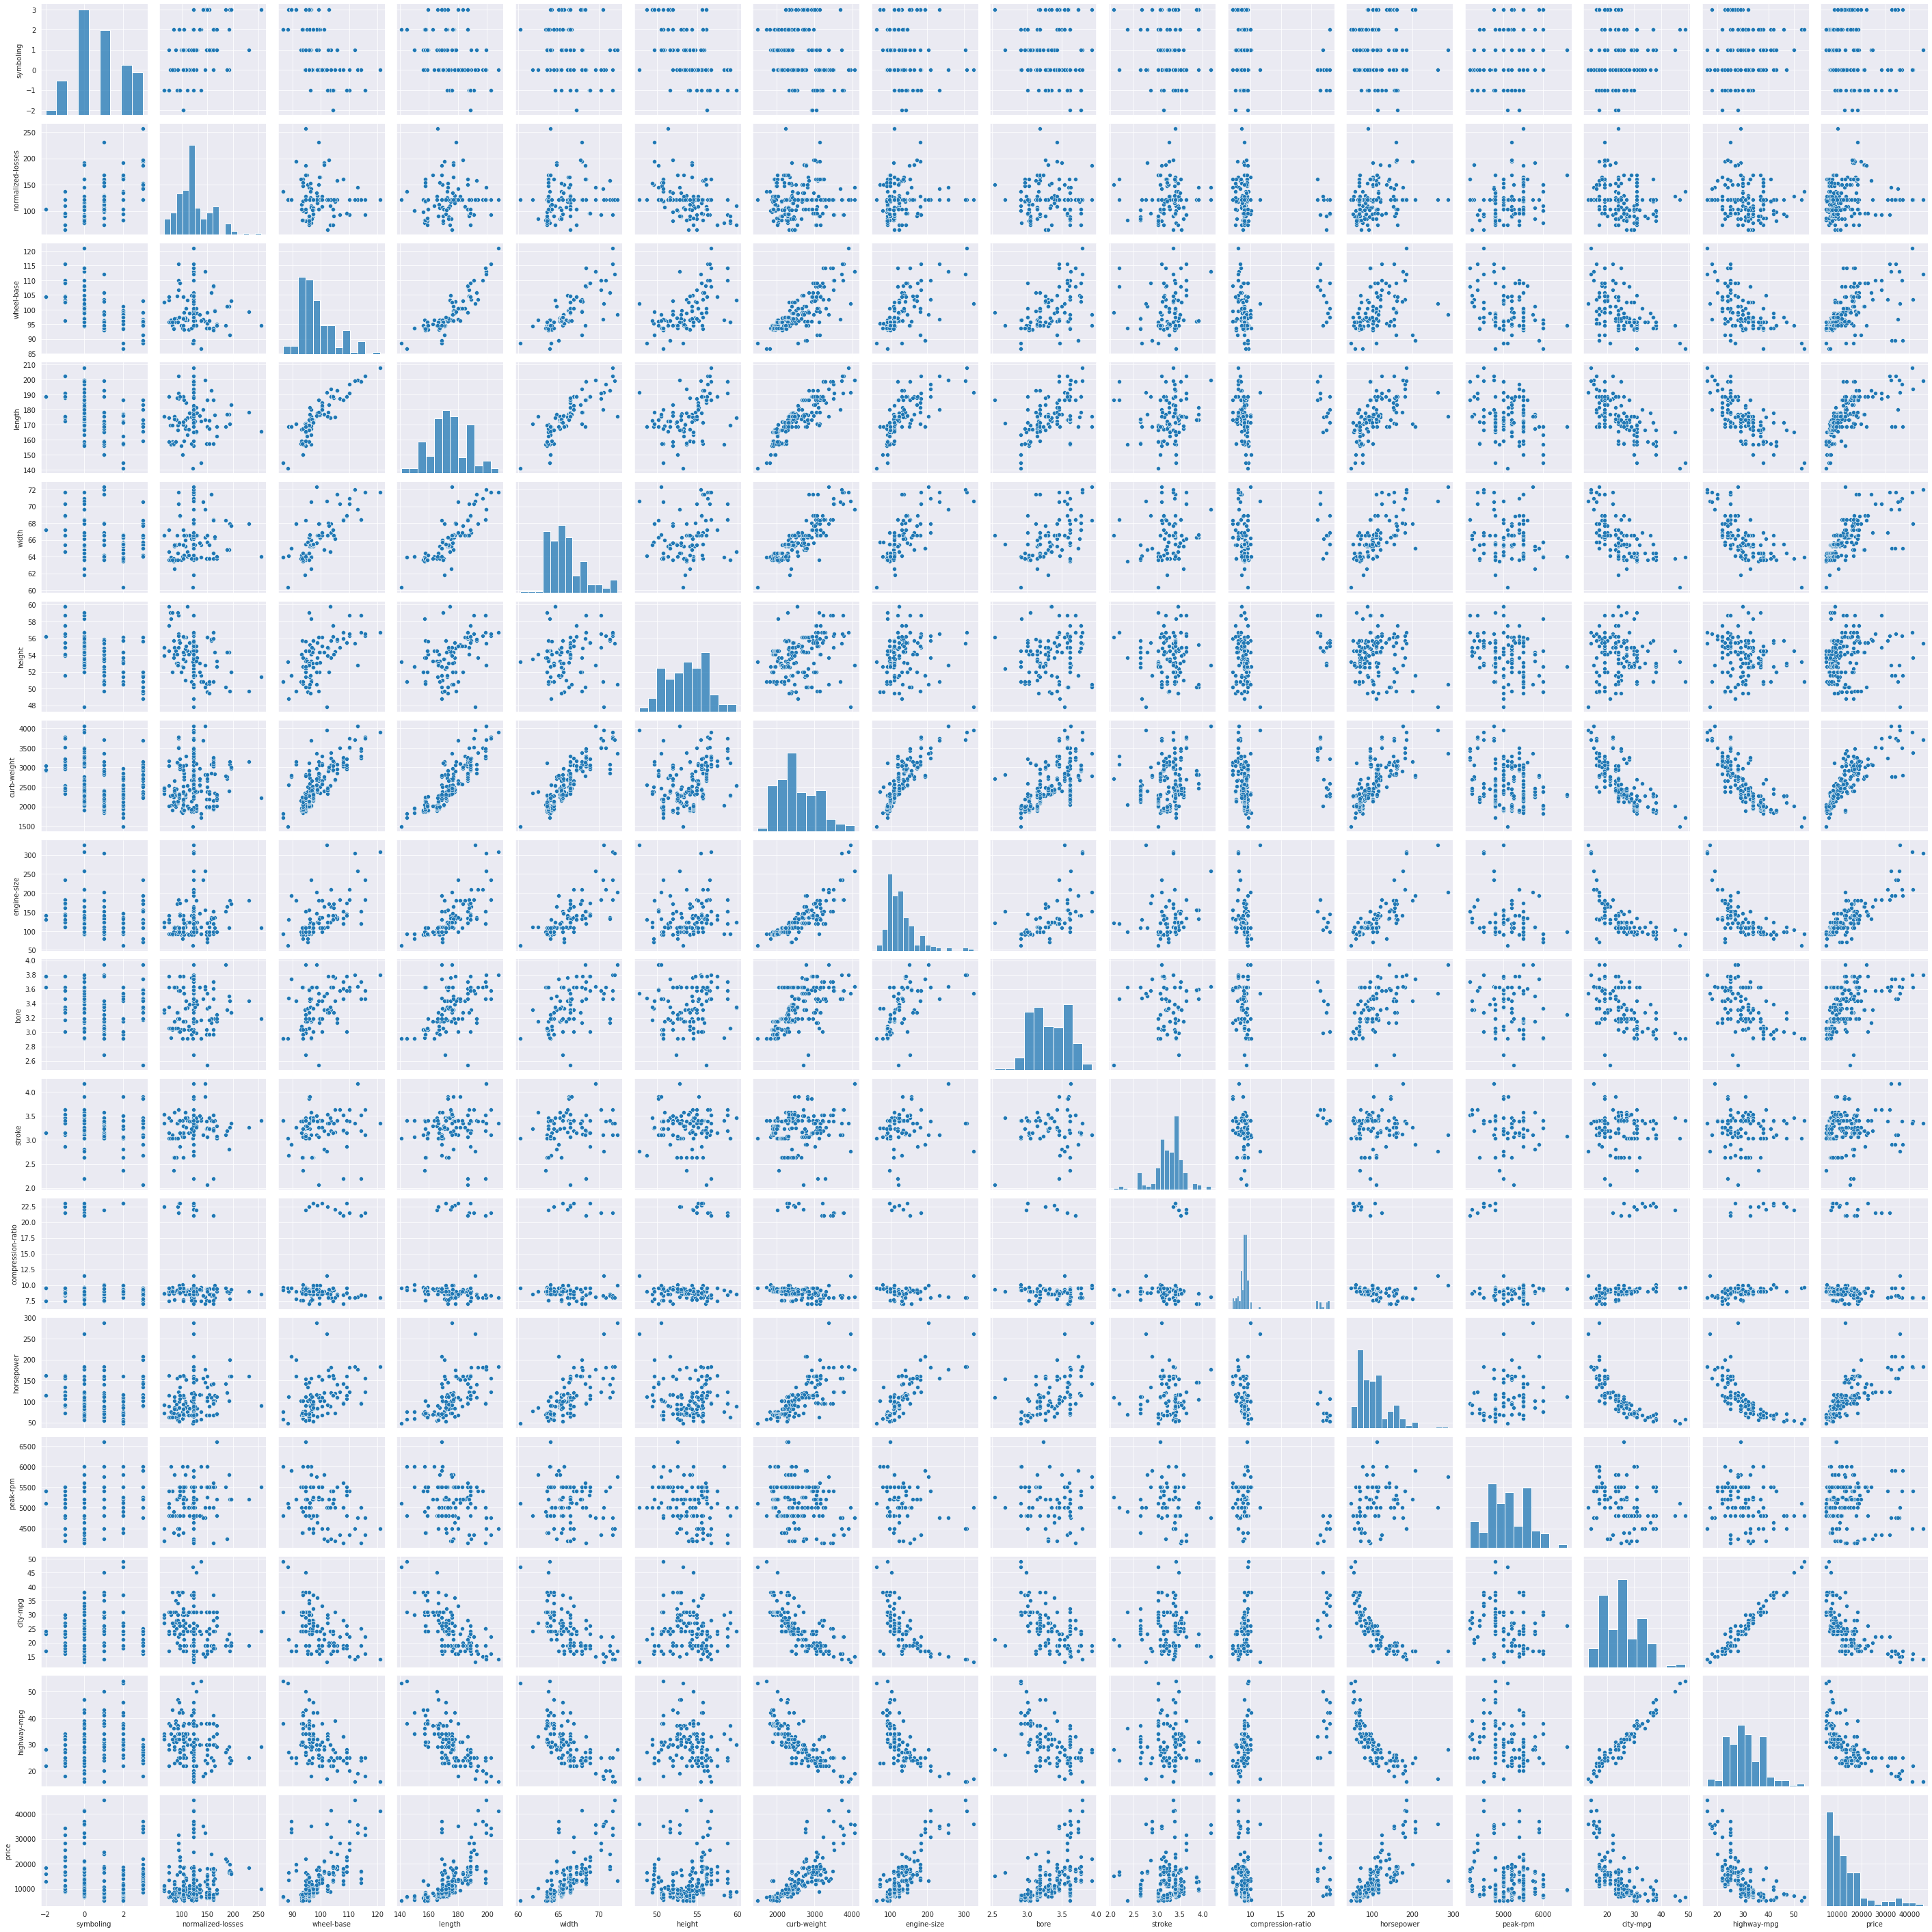

In [0]:
plt.figure(figsize=(10,10))
sns.pairplot(df.select_dtypes(include='number'))

The pairplot can help us gaining quick insights on the correlations of variables, but can get cluttered if we have many features.  
We can also try the heatmap of correlations:

Out[123]: <AxesSubplot:>

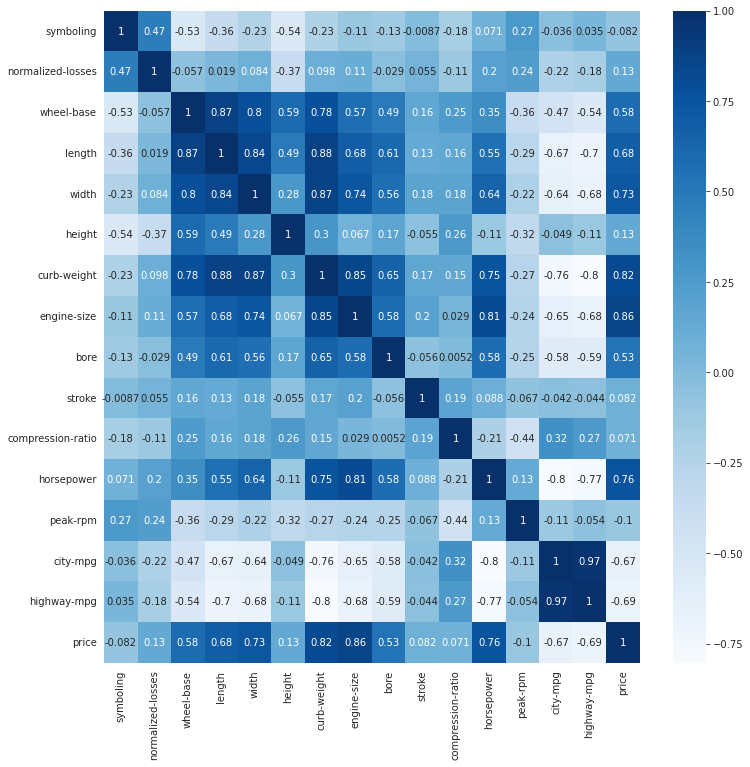

In [0]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

##### Positive Correlation  
Price – wheel_base, length, width, curb_weight, engine_size, bore, horsepower  
wheelbase – length, width, height, curb_weight, engine_size, price  
horsepower – length, width, curb_weight, engine_size, bore, price  
Highway mpg – city mpg  

##### Negative Correlation  
Price – highway_mpg, city_mpg  
highway_mpg – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price  
city – wheel base, length, width, curb_weight, engine_size, bore, horsepower, price  
This heatmap has given us great insights into the data.  

Now let us apply domain knowledge and ask the questions which will affect the price of the automobile.

##### Checking in more detail  
We can draw a vertical boxplot grouped by a categorical variable:

Out[124]: <AxesSubplot:xlabel='fuel-type', ylabel='horsepower'>

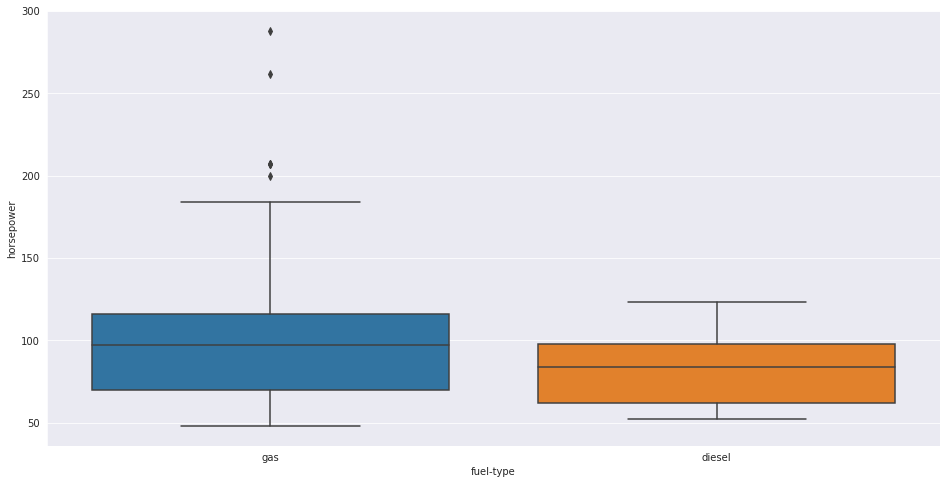

In [0]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x="fuel-type", y="horsepower", data=df, ax=ax)

And even add a third component:  
https://seaborn.pydata.org/tutorial/categorical.html

Out[125]: <seaborn.axisgrid.FacetGrid at 0x7f526628d490>

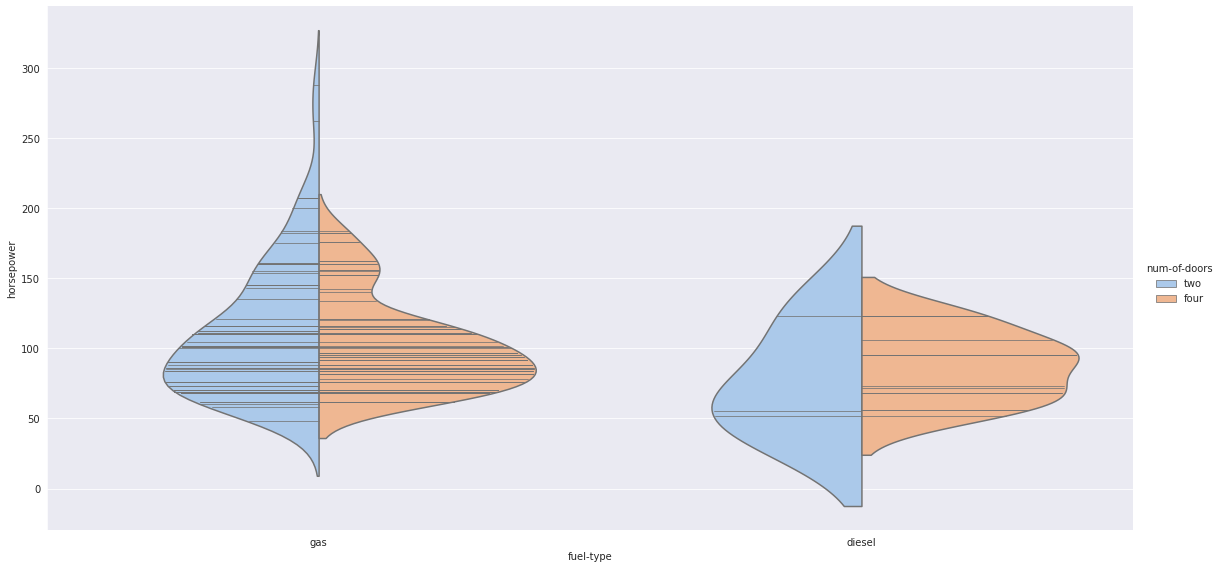

In [0]:
#sns.catplot(x="fuel-type", y="horsepower", hue="num-of-doors", kind="box", data=df, height=8, aspect=2)
sns.catplot(x="fuel-type", y="horsepower", hue="num-of-doors", kind="violin", inner="stick", split=True, palette="pastel", data=df, height=8, aspect=2)

### 5. Asking questions based on the analysis

Try to ask questions related to independent variables and the target variable.  
Example questions related to this dataset could be:  

+ How fuel_type will affect the price of the car?   
+ How does the horsepower affect the price?  
+ What is the relation between engine_size and price?  
+ How does highway_mpg affects price?  
+ What is the relation between no. of doors and price?

#### 5.1 How fuel_type will affect the price?  

Let's compare categorical data with numerical data. We are going to use a catplot from Seaborn, but there are other options for categorical variables:  
https://seaborn.pydata.org/tutorial/categorical.html

Out[126]: Text(-8.824999999999996, 0.5, 'Price')<Figure size 864x720 with 0 Axes>

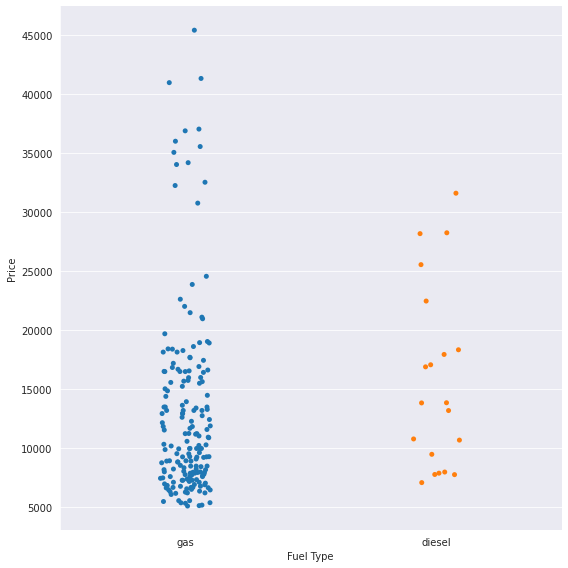

In [0]:
plt.figure(figsize=(12,10))
#https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot
sns.catplot(x='fuel-type',y='price', data=df, height=8)
plt.xlabel('Fuel Type')
plt.ylabel('Price')

#### 5.2 How does the horsepower affect the price?  

Matplotlib and Seaborn have very nice graphs to visualize numerical relationships:  
https://seaborn.pydata.org/tutorial/relational.html  
https://matplotlib.org/stable/gallery/index.html

Out[127]: Text(0, 0.5, 'Price')

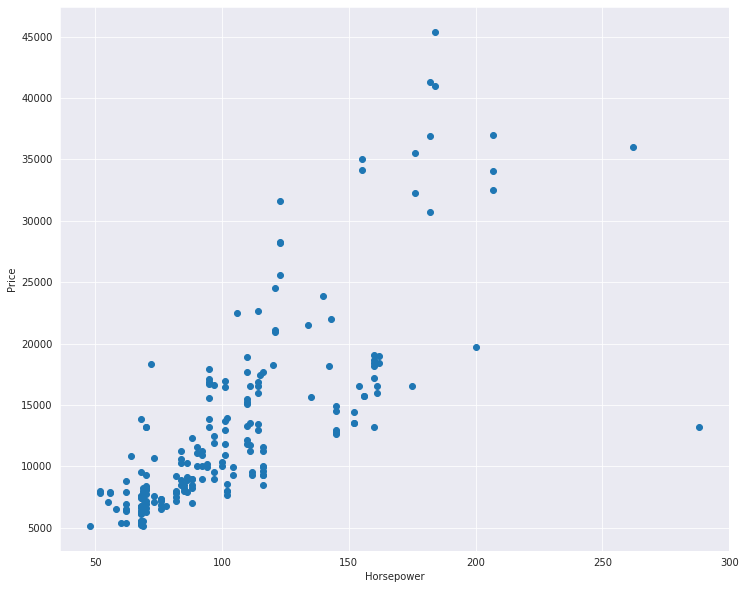

In [0]:
plt.figure(figsize=(12,10))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
plt.scatter(x='horsepower',y='price', data=df)
plt.xlabel('Horsepower')
plt.ylabel('Price')

Out[128]: <seaborn.axisgrid.JointGrid at 0x7f5265f2e700>

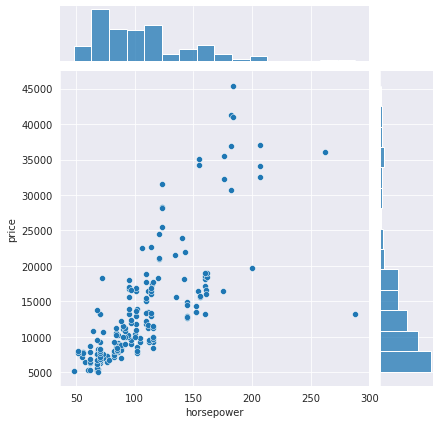

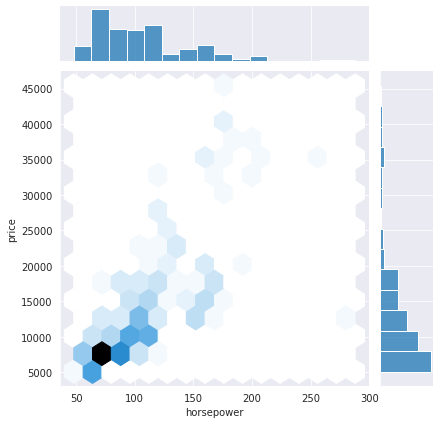

In [0]:
#https://seaborn.pydata.org/generated/seaborn.jointplot.html

sns.jointplot(x='horsepower',y='price', data=df)
sns.jointplot(x='horsepower',y='price', data=df, kind='hex')

We can see that most of the horsepower value lies between 50-150 has price mostly between 5000-25000, there are outliers also(between 200-300).  
Let’s see a count between 50-100 i.e univariate analysis of horsepower.

Out[129]: <AxesSubplot:xlabel='horsepower', ylabel='Count'>

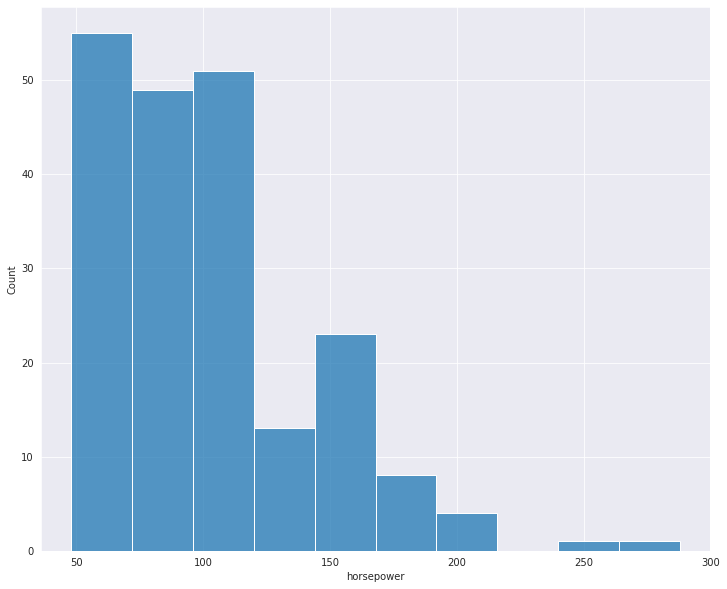

In [0]:
plt.figure(figsize=(12,10))
#https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df.horsepower,bins=10)

The average count between 50-100 is 50 and it is positively skewed.

#### 5.3 What is the relation between engine_size and price?

Out[130]: Text(0, 0.5, 'Price')

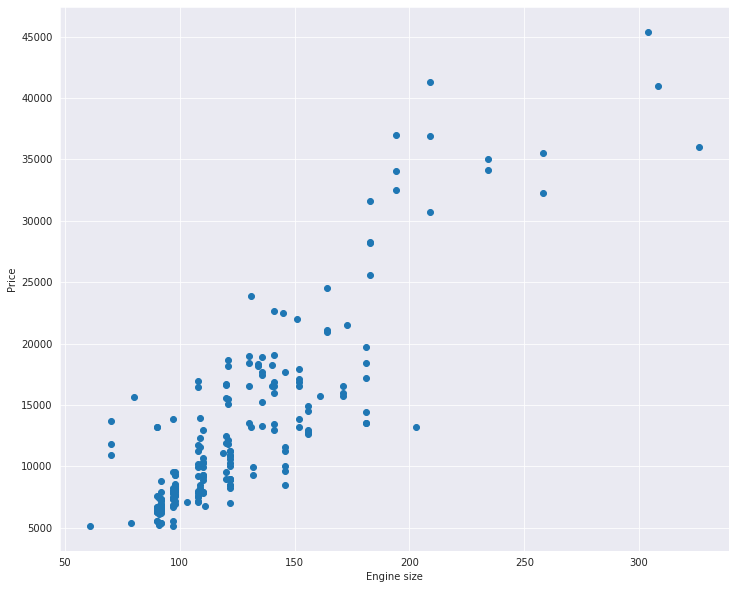

In [0]:
plt.figure(figsize=(12,10))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
plt.scatter(x='engine-size',y='price',data=df)
plt.xlabel('Engine size')
plt.ylabel('Price')

Out[131]: <seaborn.axisgrid.JointGrid at 0x7f5265c04ca0>

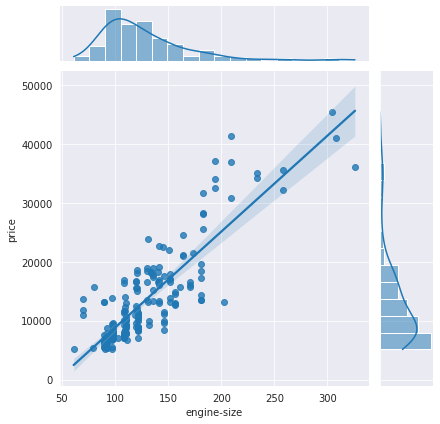

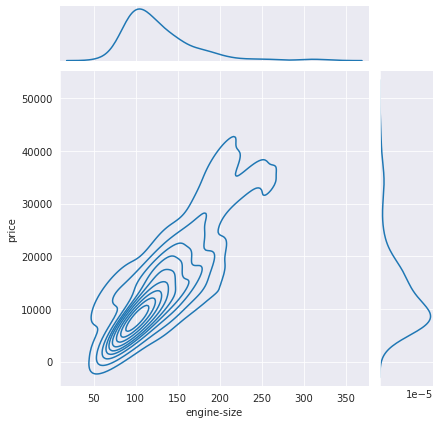

In [0]:
sns.jointplot(x='engine-size',y='price', data=df, kind='reg')
sns.jointplot(x='engine-size',y='price', data=df, kind='kde')

We can observe that the pattern is similar to horsepower vs price.

#### 5.4 How does highway_mpg affects price?

Out[132]: Text(0, 0.5, 'Price')

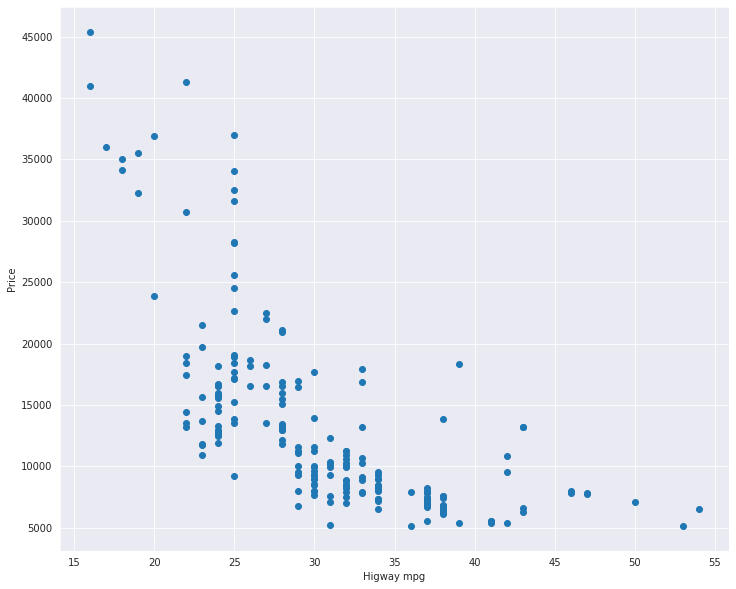

In [0]:
plt.figure(figsize=(12,10))
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html  
plt.scatter(x='highway-mpg',y='price',data=df)
plt.xlabel('Higway mpg')
plt.ylabel('Price')

We can see price decreases with an increase in higway_mpg.

#### 5.5 What is the relation between no. of doors and price?  

Let us first check the number of doors.

Out[133]: <AxesSubplot:>

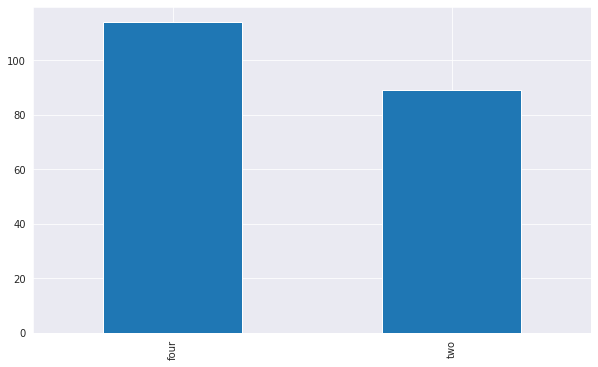

In [0]:
#Unique values in num_of_doors
df["num-of-doors"].value_counts().plot(kind="bar", figsize=(10,6))

Out[134]: <AxesSubplot:xlabel='price', ylabel='num-of-doors'>

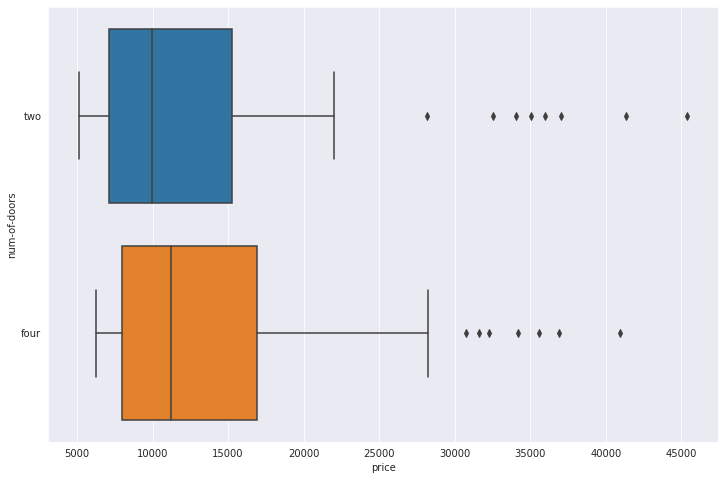

In [0]:
plt.figure(figsize=(12,8))
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x='price', y='num-of-doors',data=df)

With this boxplot, we can conclude that the average price of a vehicle with two doors is 10000,  and the average price of a vehicle with four doors is close to 12000.  
With this plot, we have gained enough insights from data and our data is ready to build a model.

##### There are ways to explore relationships between more than two variables; although it can get a bit more complicated to interpret.

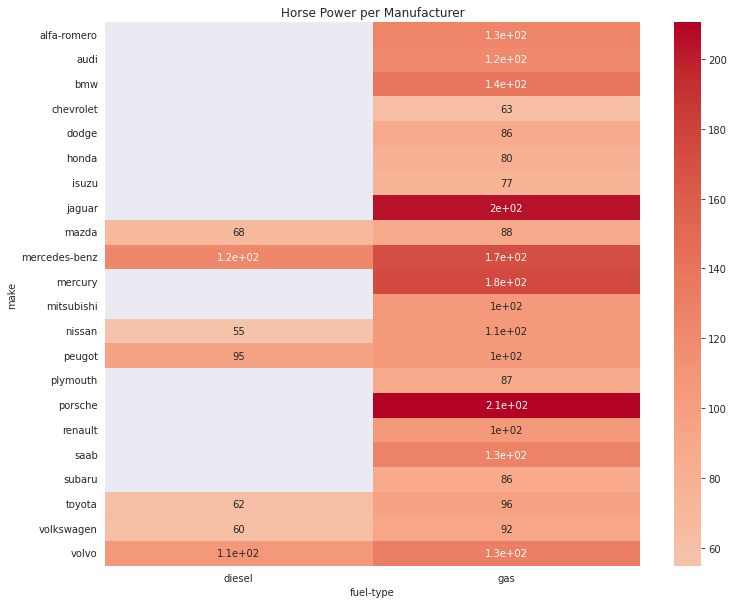

In [0]:
#Create a pivot table for car manufactures and fuel with horsepower rate as values
grouped = pd.pivot_table(data=df,index='make',columns='fuel-type',values='horsepower',aggfunc='mean')

#Create a heatmap to visualize manufactures, fuel type and horse power
plt.figure(figsize=[12,10])
sns.heatmap(grouped, annot=True, cmap='coolwarm', center=0.117)
plt.title("Horse Power per Manufacturer")
plt.show()

## II - Feature Engineering and Selection

This will be developed in the next modules

## III - Modeling

This will be developed in the next modules

## IV - Evaluation

This will be developed in the next modules

# Your Turn!

#### Open the datasets available for the use cases and start the EDA.  
#### You will be able to make a better decision on which one to use and how to exploit them.

In [0]:
df = pd.read_csv("../../3_artificial_use_case/1_Classification_RECOMMENDED/Bank_Dataset/bank-additional-full.csv", sep=";")
df.head()

age 
 job 
 marital 
 education 
 default 
 housing 
 loan 
 contact 
 month 
 day_of_week 
 ... 
 campaign 
 pdays 
 previous 
 poutcome 
 emp.var.rate 
 cons.price.idx 
 cons.conf.idx 
 euribor3m 
 nr.employed 
 y 
 
 
 
 
 0 
 56 
 housemaid 
 married 
 basic.4y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 1 
 57 
 services 
 married 
 high.school 
 unknown 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 2 
 37 
 services 
 married 
 high.school 
 no 
 yes 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 3 
 40 
 admin. 
 married 
 basic.6y 
 no 
 no 
 no 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 4 
 56 
 services 
 married 
 high.school 
 no 
 no 
 yes 
 telephone 
 may 
 mon 
 ... 
 1 
 999 
 0 
 nonexistent 
 1.1 
 93.994 
 -36.4 
 4.857 
 5191.0 
 no 
 
 
 
 5 rows × 21 columns

In [0]:
df = pd.read_csv("../../3_artificial_use_case/2_Regression_RECOMMENDED/Datasets/2015.csv")
df.head()

Country 
 Region 
 Happiness Rank 
 Happiness Score 
 Standard Error 
 Economy (GDP per Capita) 
 Family 
 Health (Life Expectancy) 
 Freedom 
 Trust (Government Corruption) 
 Generosity 
 Dystopia Residual 
 
 
 
 
 0 
 Switzerland 
 Western Europe 
 1 
 7.587 
 0.03411 
 1.39651 
 1.34951 
 0.94143 
 0.66557 
 0.41978 
 0.29678 
 2.51738 
 
 
 1 
 Iceland 
 Western Europe 
 2 
 7.561 
 0.04884 
 1.30232 
 1.40223 
 0.94784 
 0.62877 
 0.14145 
 0.43630 
 2.70201 
 
 
 2 
 Denmark 
 Western Europe 
 3 
 7.527 
 0.03328 
 1.32548 
 1.36058 
 0.87464 
 0.64938 
 0.48357 
 0.34139 
 2.49204 
 
 
 3 
 Norway 
 Western Europe 
 4 
 7.522 
 0.03880 
 1.45900 
 1.33095 
 0.88521 
 0.66973 
 0.36503 
 0.34699 
 2.46531 
 
 
 4 
 Canada 
 North America 
 5 
 7.427 
 0.03553 
 1.32629 
 1.32261 
 0.90563 
 0.63297 
 0.32957 
 0.45811 
 2.45176